<a href="https://colab.research.google.com/github/Jazhyc/ECG-Classification/blob/main/02_balancing_and_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Balancing and training

## Loading Data

In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE



In [ ]:
# Training
!gdown 1xQ9aRWHQX6PY50i4aVtDWQ8bj65Whv9F


Downloading...
From: https://drive.google.com/uc?id=1xQ9aRWHQX6PY50i4aVtDWQ8bj65Whv9F
To: /content/train_data.csv
100% 661M/661M [00:02<00:00, 291MB/s]


In [ ]:
train_data = pd.read_csv("train_data.csv")

In [ ]:
train_data.head()

,label,1,2,3,4,5,6,7,8,9,...,179,180,181,182,183,184,185,186,187,188
0,N,0.033045,0.033095,0.033097,0.033164,0.033331,0.033637,0.034092,0.034446,0.034488,...,0.902499,0.867817,0.825207,0.773940,0.712724,0.641617,0.564006,0.484794,0.407136,0.333189
1,N,0.008200,0.007931,0.007671,0.007322,0.006947,0.006654,0.006465,0.006437,0.006447,...,0.494365,0.308167,0.221376,0.182012,0.160445,0.143667,0.126433,0.107436,0.087317,0.067923
2,N,0.026813,0.026672,0.026014,0.024583,0.022654,0.020949,0.019888,0.019555,0.019589,...,0.838057,0.544801,0.310489,0.154895,0.069840,0.033327,0.022422,0.021690,0.023520,0.025346
3,N,0.486861,0.457374,0.427510,0.406831,0.399018,0.399805,0.402040,0.400542,0.395892,...,0.211379,0.209057,0.218530,0.240611,0.268415,0.288957,0.296424,0.294760,0.288985,0.281997
4,N,1.217721,1.235823,1.253457,1.270488,1.287696,1.306380,1.328885,1.356632,1.387558,...,18.570525,14.302498,10.004115,6.307513,3.585583,1.904121,1.086292,0.826987,0.816262,0.837106


In [ ]:
# How do we handle all of these labels?
train_data.label.unique()

array(['N', 'A', 'V', 'L', '+', '"', 'F', '/', 'R', '!', 'j', 'f', 'x',
       '~', 'E', '|', 'a', 'J', 'Q', '[', 'S', 'e', ']'], dtype=object)

Original Class Distribution:
N    120067
L     12917
R     11658
V     11276
/     11262
A      4084
+      2006
f      1594
F      1280
~       981
!       765
"       680
j       354
x       318
a       227
|       216
E       170
J       127
Q        51
e        25
[        10
]         9
S         4
Name: label, dtype: int64


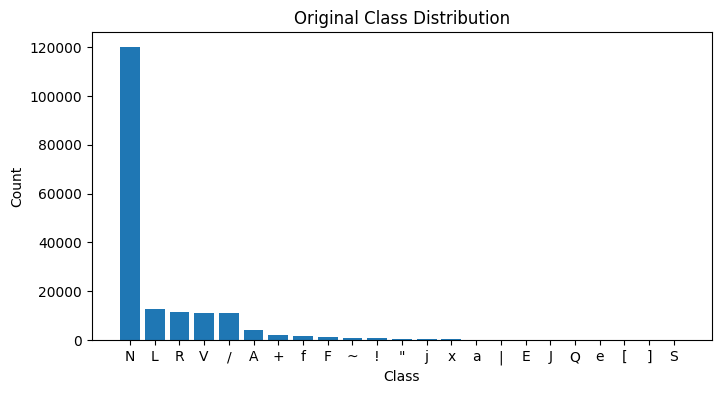

In [ ]:
original_class_distribution = train_data['label'].value_counts()
print("Original Class Distribution:")
print(original_class_distribution)
plt.figure(figsize=(8, 4))
plt.bar(original_class_distribution.index, original_class_distribution.values)
plt.title('Original Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


# Filtering the data

Filtered Class Distribution:
N    120067
L     12917
R     11658
V     11276
/     11262
A      4084
f      1594
F      1280
j       354
a       227
E       170
J       127
e        25
S         4
Name: label, dtype: int64


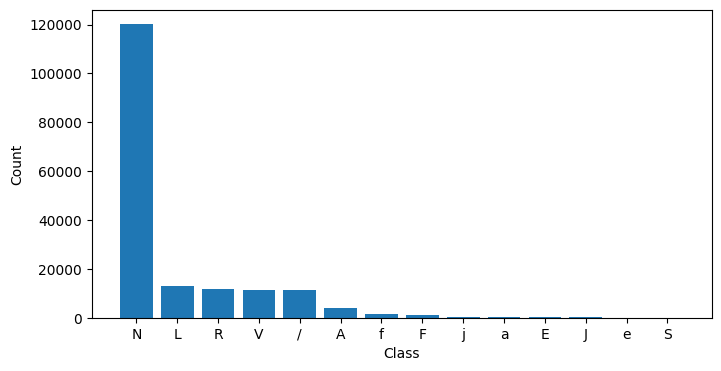

In [ ]:
# dropping unwanted labels
labels_to_drop = ['+', '~', '!', '"', 'x', '|', 'Q', '[', ']']

# Drop rows with the specified labels
train_data_filtered = train_data[~train_data['label'].isin(labels_to_drop)]

filtered_class_distribution = train_data_filtered['label'].value_counts()
print("Filtered Class Distribution:")
print(filtered_class_distribution)
plt.figure(figsize=(8, 4))
plt.bar(filtered_class_distribution.index, filtered_class_distribution.values)
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

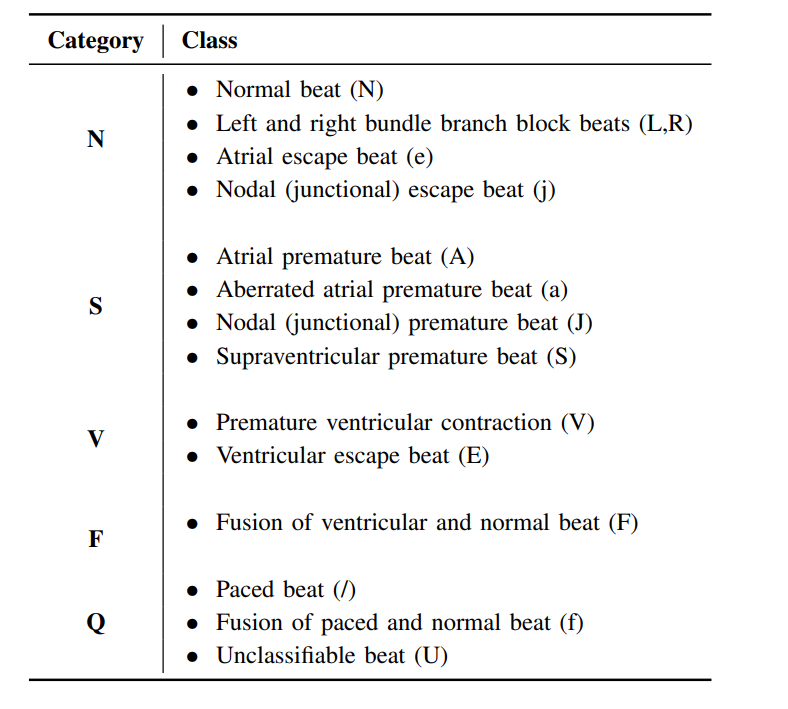

# Renaming labels into five categories

In [ ]:
# creating a map
label_mapping = {
    'N': 'N',
    'R': 'N',
    'L': 'N',
    'e': 'N',
    'j': 'N',
    'A': 'S',
    'a': 'S',
    'J': 'S',
    'S': 'S',
    'V': 'V',
    'E': 'V',
    'F': 'F',
    '/': 'Q',
    'f': 'Q',
}

# Replace the labels with the new categories
train_data_filtered['label'] = train_data_filtered['label'].replace(label_mapping)


<ipython-input-8-18af07574af3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_filtered['label'] = train_data_filtered['label'].replace(label_mapping)


Filtered Class Distribution:
N    145021
Q     12856
V     11446
S      4442
F      1280
Name: label, dtype: int64


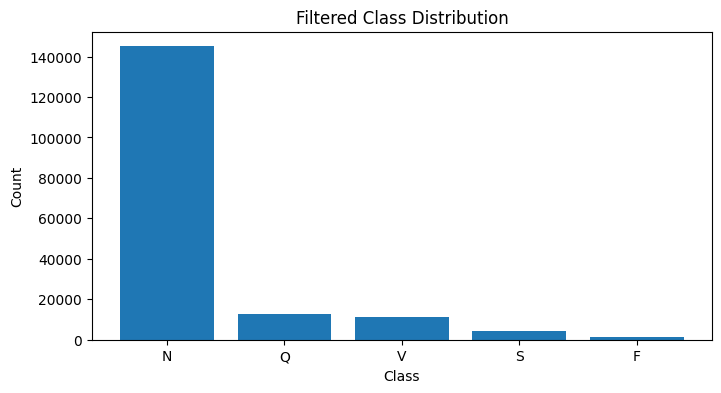

In [ ]:
filtered_class_distribution = train_data_filtered['label'].value_counts()
print("Filtered Class Distribution:")
print(filtered_class_distribution)
plt.figure(figsize=(8, 4))
plt.bar(filtered_class_distribution.index, filtered_class_distribution.values)
plt.title('Filtered Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Balancing using SMOTE

In [ ]:
X = train_data_filtered.iloc[:, 1:]  # Features (sensor data)
y = train_data_filtered.iloc[:, 0]  # Labels


smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

train_data_balanced = pd.DataFrame(X_resampled, columns=train_data_filtered.columns[1:])
train_data_balanced['label'] = y_resampled

<ipython-input-10-ed011a90837b>:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data_balanced['label'] = y_resampled


Balanced Class Distribution:
N    145021
S    145021
V    145021
F    145021
Q    145021
Name: label, dtype: int64


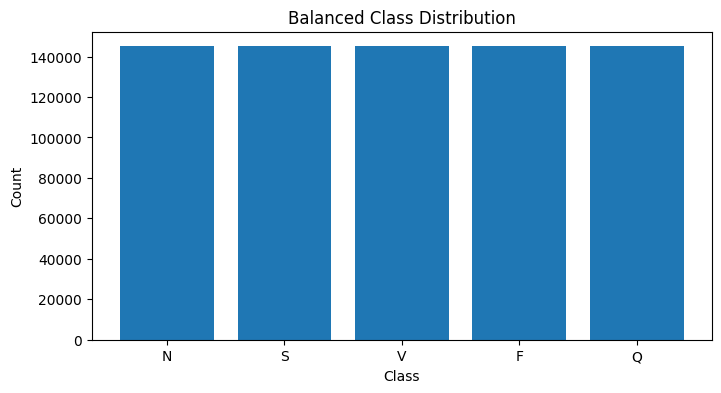

In [ ]:
balanced_class_distribution = train_data_balanced['label'].value_counts()
print("Balanced Class Distribution:")
print(balanced_class_distribution)
plt.figure(figsize=(8, 4))
plt.bar(balanced_class_distribution.index, balanced_class_distribution.values)
plt.title('Balanced Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# Creating the model

In [ ]:
# Some imports, I'm not certain why the the interpretor thinks the imports are missing
import tensorflow as tf
from tensorflow import Tensor
from tensorflow.keras.layers import Input, Conv1D, ReLU, BatchNormalization, \
                        Add, MaxPooling1D, Flatten, Dense, Activation, Softmax
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import L2

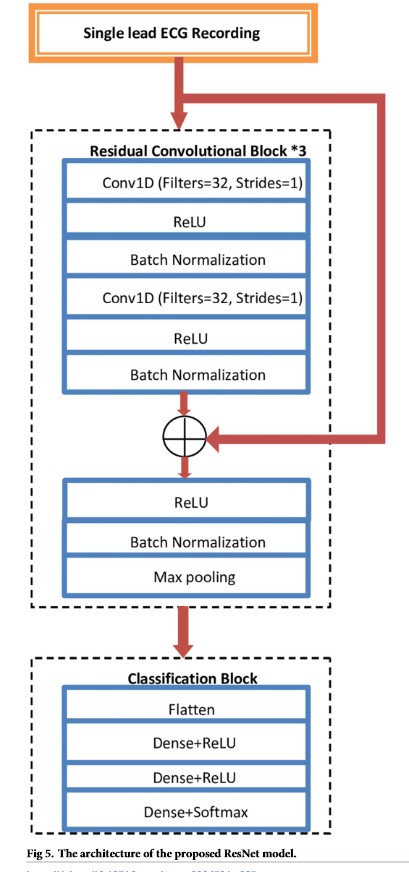

In [ ]:
def relu_bn(inputs: Tensor) -> Tensor:
    relu = ReLU()(inputs)
    bn = BatchNormalization()(relu)
    return bn

In [ ]:
def create_block(input, reg_coeff):
  conv_1 = Conv1D(filters=32, strides=1, kernel_size=3, padding = 'same', kernel_regularizer=L2(reg_coeff))(input)
  act_1 = relu_bn(conv_1)
  conv_2 = Conv1D(filters=32, strides=1, kernel_size=3, padding = 'same', kernel_regularizer=L2(reg_coeff))(act_1)
  act_2 = relu_bn(conv_2)

  # Addition, resnet
  residual = Conv1D(filters=32, strides=1, kernel_size=1)(input)
  add = Add()([residual, act_2])
  act_3 = relu_bn(add)

  # Pooling
  pool = MaxPooling1D(pool_size=5, strides=2)(act_3)

  return pool

In [ ]:
# CNN Block
def create_cnn_block(input, reg_coeff):
  block_1 = create_block(input, reg_coeff)
  block_2 = create_block(block_1, reg_coeff)
  block_3 = create_block(block_2, reg_coeff)

  return block_3

In [ ]:
def dense_relu(input):
    return Activation('relu')(Dense(units=32)(input))

In [ ]:
# Classification Block
def create_classification_block(cnn_block):
  flat = Flatten()(cnn_block)
  dense_1 = dense_relu(flat)
  dense_2 = dense_relu(dense_1)

  # Output layer
  dense_output = Dense(units=5)(dense_2)
  softmax_output = Softmax()(dense_output)

  return softmax_output

In [ ]:
# Create the model
def create_model(reg_coeff):
  input = Input(shape=(188,1))
  cnn_block = create_cnn_block(input, reg_coeff)
  softmax_output = create_classification_block(cnn_block)
  model = Model(input, softmax_output)

  model.compile(
          optimizer='adam',
          loss='categorical_crossentropy',
          metrics=['accuracy', 'TruePositives', 'TrueNegatives', 'FalsePositives', 'FalseNegatives']
  )

  return model

In [ ]:
  # Is this correct?
# tf.keras.utils.plot_model(model)

# Training the model

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

In [ ]:
# Extract the features (training data)
features = train_data_balanced.iloc[:, :188]

# Extract the labels
labels = train_data_balanced['label'].values

# Label encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

targets = to_categorical(labels_encoded)

In [ ]:
features[0:5]

,1,2,3,4,5,6,7,8,9,10,...,179,180,181,182,183,184,185,186,187,188
0,0.033045,0.033095,0.033097,0.033164,0.033331,0.033637,0.034092,0.034446,0.034488,0.034301,...,0.902499,0.867817,0.825207,0.773940,0.712724,0.641617,0.564006,0.484794,0.407136,0.333189
1,0.008200,0.007931,0.007671,0.007322,0.006947,0.006654,0.006465,0.006437,0.006447,0.006178,...,0.494365,0.308167,0.221376,0.182012,0.160445,0.143667,0.126433,0.107436,0.087317,0.067923
2,0.026813,0.026672,0.026014,0.024583,0.022654,0.020949,0.019888,0.019555,0.019589,0.019599,...,0.838057,0.544801,0.310489,0.154895,0.069840,0.033327,0.022422,0.021690,0.023520,0.025346
3,0.486861,0.457374,0.427510,0.406831,0.399018,0.399805,0.402040,0.400542,0.395892,0.393633,...,0.211379,0.209057,0.218530,0.240611,0.268415,0.288957,0.296424,0.294760,0.288985,0.281997
4,1.217721,1.235823,1.253457,1.270488,1.287696,1.306380,1.328885,1.356632,1.387558,1.417420,...,18.570525,14.302498,10.004115,6.307513,3.585583,1.904121,1.086292,0.826987,0.816262,0.837106


## Cross Validation to determine L2 value (Very Intensive)
There's no need to execute this again unless we test more hyper parameters or change pre-processing

In [ ]:
# Setup cross validation
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score
import gc
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [ ]:
# Execute this cell to reset the dict
accuracy_per_reg = dict()

In [ ]:
reg_coeffs = [
    0.01,
    0.001,
    0.0001,
    0.00001,
]

for reg_coeff in reg_coeffs:

  print(f"Testing regularization value of {reg_coeff}")

  accuracy_per_fold = []

  for train_index, test_index in kfold.split(features, targets.argmax(1)):
      X_train, X_test = features.iloc[train_index], features.iloc[test_index]
      y_train, y_test = targets[train_index], targets[test_index]

      model = create_model(reg_coeff)

      model.fit(
          x = X_train,
          y = y_train,
          epochs = 10, # Training all models might take around 2 hours to complete with this value
          batch_size = 512 # Higher values speed up training but take more RAM
      )

      loss, accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives = model.evaluate(X_test, y_test)
      print(f'Accuracy: {accuracy}')
      accuracy_per_fold.append(accuracy)

      del model, X_train, X_test, y_train, y_test

      # Prevent the kernel from crashing due to high RAM usage
      tf.keras.backend.clear_session()
      gc.collect()

  accuracy_per_reg[reg_coeff] = accuracy_per_fold

Testing regularization value of 0.01
Epoch 1/10
1133/1133 [==============================] - 42s 25ms/step - loss: 0.6416 - accuracy: 0.9219 - true_positives: 525133.0000 - true_negatives: 2287382.0000 - false_positives: 32954.0000 - false_negatives: 54951.0000
Epoch 2/10
1133/1133 [==============================] - 29s 26ms/step - loss: 0.1973 - accuracy: 0.9579 - true_positives: 553326.0000 - true_negatives: 2298726.0000 - false_positives: 21610.0000 - false_negatives: 26758.0000
Epoch 3/10
1133/1133 [==============================] - 28s 25ms/step - loss: 0.1493 - accuracy: 0.9655 - true_positives: 558522.0000 - true_negatives: 2302246.0000 - false_positives: 18090.0000 - false_negatives: 21562.0000
Epoch 4/10
1133/1133 [==============================] - 28s 24ms/step - loss: 0.1277 - accuracy: 0.9699 - true_positives: 561484.0000 - true_negatives: 2304367.0000 - false_positives: 15969.0000 - false_negatives: 18600.0000
Epoch 5/10
1133/1133 [==============================] - 28s 24m

In [ ]:
# Get average accuracy for each reg value
for key, value in accuracy_per_reg.items():
    print(f"Value {key} = {sum(value) / len(value)}")
    print(f"Accuracy per fold {value}")

Value 0.01 = 0.9102640271186828
Accuracy per fold [0.8455671668052673, 0.9255004525184631, 0.8778107762336731, 0.9581233263015747, 0.944318413734436]
Value 0.001 = 0.9610635638237
Accuracy per fold [0.980202853679657, 0.9622675180435181, 0.9171844124794006, 0.9680942893028259, 0.9775687456130981]
Value 0.0001 = 0.9506554245948792
Accuracy per fold [0.9713007211685181, 0.9252315163612366, 0.9169430732727051, 0.9812510013580322, 0.9585508108139038]
Value 1e-05 = 0.9572075843811035
Accuracy per fold [0.8759007453918457, 0.9689148664474487, 0.9792581796646118, 0.9757069945335388, 0.9862571358680725]


## Creating model with best regularization value

In [ ]:
tf.keras.backend.clear_session()

best_value = 0.001
model = create_model(best_value)

model.fit(
    x = features,
    y = targets,
    epochs = 10, # This is where the accuracy plateaued in the reference paper
    batch_size = 512
)

Epoch 1/10
1417/1417 [==============================] - 44s 24ms/step - loss: 0.2824 - accuracy: 0.9389 - true_positives: 672601.0000 - true_negatives: 2866704.0000 - false_positives: 33716.0000 - false_negatives: 52504.0000
Epoch 2/10
1417/1417 [==============================] - 34s 24ms/step - loss: 0.1434 - accuracy: 0.9705 - true_positives: 702013.0000 - true_negatives: 2881022.0000 - false_positives: 19398.0000 - false_negatives: 23092.0000
Epoch 3/10
1417/1417 [==============================] - 34s 24ms/step - loss: 0.1081 - accuracy: 0.9762 - true_positives: 706732.0000 - true_negatives: 2884502.0000 - false_positives: 15918.0000 - false_negatives: 18373.0000
Epoch 4/10
1417/1417 [==============================] - 34s 24ms/step - loss: 0.0920 - accuracy: 0.9787 - true_positives: 708786.0000 - true_negatives: 2886037.0000 - false_positives: 14383.0000 - false_negatives: 16319.0000
Epoch 5/10
1417/1417 [==============================] - 34s 24ms/step - loss: 0.0820 - accuracy: 0.9

In [ ]:
# Save the model to prevent loss of progress
# I'll upload it to a drive later
model.save("ecg_model")

In [ ]:
!zip -r model.zip ecg_model/

  adding: ecg_model/ (stored 0%)
  adding: ecg_model/keras_metadata.pb (deflated 94%)
  adding: ecg_model/assets/ (stored 0%)
  adding: ecg_model/fingerprint.pb (stored 0%)
  adding: ecg_model/variables/ (stored 0%)
  adding: ecg_model/variables/variables.index (deflated 76%)
  adding: ecg_model/variables/variables.data-00000-of-00001 (deflated 13%)
  adding: ecg_model/saved_model.pb (deflated 90%)


# Testing the model

In [ ]:
# Testing
!gdown 1AAWfhiD-FZIP543VvOhfrlUVu5jECH6z

Downloading...
From: https://drive.google.com/uc?id=1AAWfhiD-FZIP543VvOhfrlUVu5jECH6z
To: /content/test_data.csv
100% 165M/165M [00:01<00:00, 83.0MB/s]


In [ ]:
test_data = pd.read_csv("test_data.csv")

In [ ]:
original_class_distribution = test_data['label'].value_counts()
print("Original Class Distribution:")
print(original_class_distribution)

Original Class Distribution:
N    29965
L     3227
V     2984
R     2854
/     2786
A     1004
+      482
f      370
F      326
~      249
"      194
!      179
j      104
a       73
x       68
|       48
E       42
J       39
Q       15
e        7
]        3
[        2
Name: label, dtype: int64


In [ ]:
# dropping unwanted labels
labels_to_drop = ['+', '~', '!', '"', 'x', '|', 'Q', '[', ']']

# Drop rows with the specified labels
test_data_filtered = test_data[~test_data['label'].isin(labels_to_drop)]

filtered_class_distribution = test_data_filtered['label'].value_counts()
print("Filtered Class Distribution:")
print(filtered_class_distribution)

Filtered Class Distribution:
N    29965
L     3227
V     2984
R     2854
/     2786
A     1004
f      370
F      326
j      104
a       73
E       42
J       39
e        7
Name: label, dtype: int64


In [ ]:
# Replace the labels with the new categories
test_data_filtered['label'] = test_data_filtered['label'].replace(label_mapping)
filtered_class_distribution = test_data_filtered['label'].value_counts()
print("Filtered Class Distribution:")
print(filtered_class_distribution)

Filtered Class Distribution:
N    36157
Q     3156
V     3026
S     1116
F      326
Name: label, dtype: int64


<ipython-input-35-d13dfa3ef958>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data_filtered['label'] = test_data_filtered['label'].replace(label_mapping)


In [ ]:
# Extract the features (training data)
features_test = test_data_filtered.iloc[:, 1:]

# Extract the labels
labels_test = test_data_filtered['label'].values

# Label encode the labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels_test)

targets_test = to_categorical(labels_encoded)

In [ ]:
print(label_encoder.classes_)

['F' 'N' 'Q' 'S' 'V']


In [ ]:
loss, accuracy, TruePositives, TrueNegatives, FalsePositives, FalseNegatives = model.evaluate(features_test, targets_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")
print(f"True Positives: {TruePositives}")
print(f"True Negatives: {TrueNegatives}")
print(f"False Positives: {FalsePositives}")
print(f"False Negatives: {FalseNegatives}")


1369/1369 [==============================] - 8s 5ms/step - loss: 0.1458 - accuracy: 0.9610 - true_positives: 42032.0000 - true_negatives: 173469.0000 - false_positives: 1655.0000 - false_negatives: 1749.0000
Test Loss: 0.14577428996562958
Test Accuracy: 0.9609647989273071
True Positives: 42032.0
True Negatives: 173469.0
False Positives: 1655.0
False Negatives: 1749.0


In [ ]:
print(f"Precision: {TruePositives / (TruePositives + FalsePositives) * 100:.2f}%")
print(f"Specificity: {TrueNegatives / (TrueNegatives + FalsePositives) * 100:.2f}%")
print(f"Sensitivity: {TruePositives / (TruePositives + FalseNegatives) * 100:.2f}%")

Precision: 96.21%
Specificity: 99.05%
Sensitivity: 96.01%


## Classwise Metrics


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
predictions = label_encoder.classes_[np.argmax(model.predict(features_test), axis=1)]

1369/1369 [==============================] - 4s 3ms/step


In [ ]:
solutions = label_encoder.classes_[np.argmax(targets_test, axis=1)]
print(classification_report(solutions, predictions))

              precision    recall  f1-score   support

           F       0.70      0.75      0.73       326
           N       0.99      0.97      0.98     36157
           Q       0.96      0.99      0.98      3156
           S       0.53      0.87      0.66      1116
           V       0.93      0.89      0.91      3026

    accuracy                           0.96     43781
   macro avg       0.82      0.89      0.85     43781
weighted avg       0.97      0.96      0.96     43781



In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

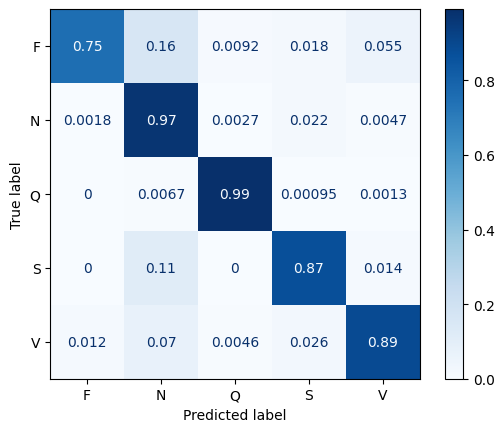

In [ ]:
cm = confusion_matrix(solutions, predictions)
disp = ConfusionMatrixDisplay.from_predictions(solutions, predictions, display_labels=label_encoder.classes_, cmap=plt.cm.Blues, normalize="true")
plt.show()